In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
random=pd.read_csv(r"C:\Users\HP\Downloads\Multiple CSV\Multiple CSV\9.random.csv",header=None)

In [3]:
random

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0
...,...,...,...
395,0.324,0.431,1.0
396,0.602,0.588,0.0
397,0.616,0.503,1.0
398,0.742,0.511,1.0


In [4]:
fv=random.iloc[:,:2]
cv=random.iloc[:,-1]

In [5]:
std=StandardScaler()
train_fv=std.fit_transform(fv)

<Axes: >

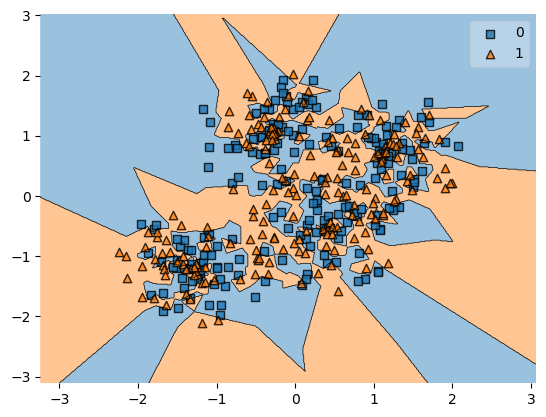

In [6]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_fv,cv.astype(int))
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

<Axes: >

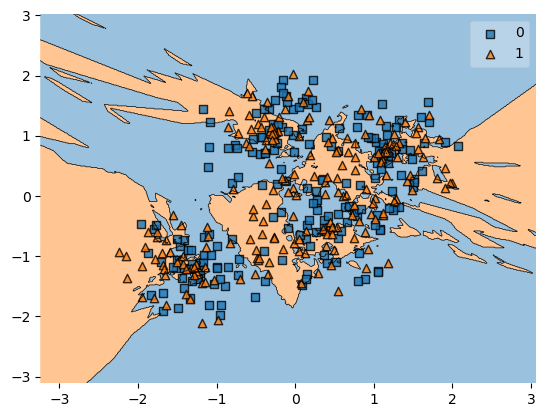

In [7]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(train_fv,cv.astype(int))
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

<Axes: >

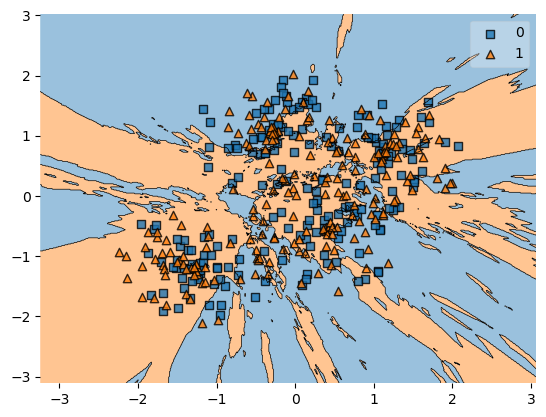

In [8]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(train_fv,cv.astype(int))
plot_decision_regions(X=train_fv,y=cv.astype(int).values,clf=knn)

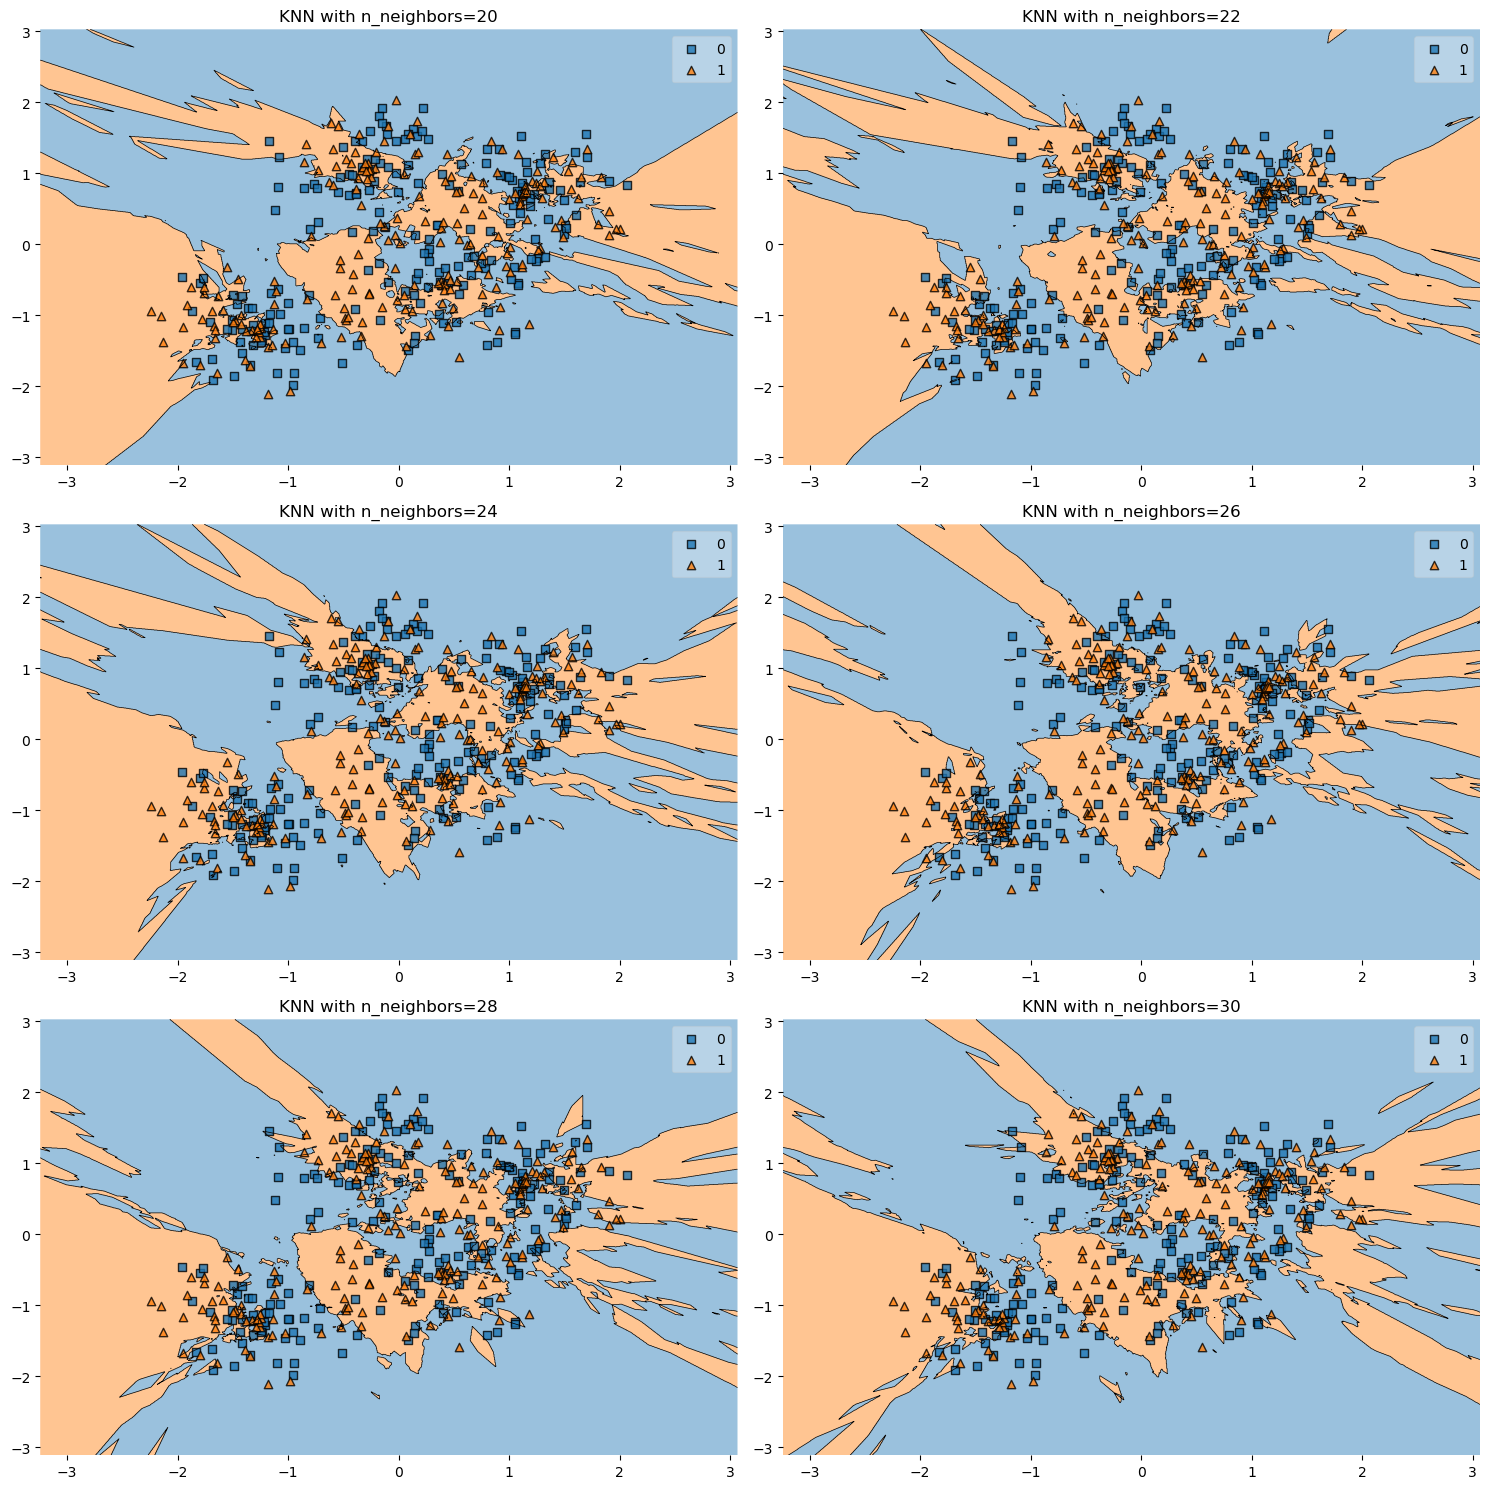

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(20,31, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_fv, cv.astype(int))
    plot_decision_regions(X=train_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

In [9]:
random

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0
...,...,...,...
395,0.324,0.431,1.0
396,0.602,0.588,0.0
397,0.616,0.503,1.0
398,0.742,0.511,1.0


In [10]:
fv=random.iloc[:,:2]
cv=random.iloc[:,-1]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,train_size=0.8,random_state=10,stratify=cv)

In [12]:
std=StandardScaler()
stand_x_train=std.fit_transform(x_train)
stand_x_test=std.transform(x_test)

In [13]:
knn=KNeighborsClassifier(n_neighbors=1)
learned_knn=knn.fit(stand_x_train,y_train)

In [14]:
predicted=learned_knn.predict(stand_x_test)

In [15]:
accuracy_score(y_test,predicted)

0.575

In [16]:
k=[]
accu=[]
error=[]
for n in range(1,250,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    learned_knn=knn.fit(stand_x_train,y_train)
    predicted=learned_knn.predict(stand_x_test)
    k.append(n)
    accu.append(accuracy_score(y_test,predicted))
    error.append(1-accuracy_score(y_test,predicted))

In [17]:
k

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249]

In [18]:
accu

[0.575,
 0.4625,
 0.575,
 0.575,
 0.575,
 0.575,
 0.6125,
 0.5625,
 0.5375,
 0.5125,
 0.5875,
 0.5625,
 0.5625,
 0.5125,
 0.5125,
 0.5,
 0.5625,
 0.5,
 0.5125,
 0.4625,
 0.5625,
 0.5375,
 0.55,
 0.5125,
 0.5375,
 0.575,
 0.5,
 0.45,
 0.5,
 0.4625,
 0.5,
 0.5125,
 0.525,
 0.475,
 0.4875,
 0.45,
 0.45,
 0.4125,
 0.4375,
 0.4,
 0.4,
 0.375,
 0.35,
 0.4,
 0.4375,
 0.45,
 0.4625,
 0.425,
 0.4125,
 0.4375,
 0.475,
 0.4625,
 0.4375,
 0.425,
 0.45,
 0.4,
 0.4375,
 0.4875,
 0.4875,
 0.475,
 0.45,
 0.4,
 0.4,
 0.325,
 0.3625,
 0.35,
 0.3125,
 0.35,
 0.3,
 0.325,
 0.35,
 0.325,
 0.3875,
 0.4125,
 0.35,
 0.4875,
 0.4625,
 0.4125,
 0.4,
 0.4375,
 0.4875,
 0.525,
 0.55,
 0.5625,
 0.575,
 0.55,
 0.5625,
 0.55,
 0.525,
 0.5,
 0.5125,
 0.55,
 0.525,
 0.5375,
 0.5625,
 0.525,
 0.4875,
 0.5,
 0.475,
 0.4625,
 0.4375,
 0.475,
 0.4875,
 0.4625,
 0.5125,
 0.5125,
 0.5375,
 0.525,
 0.5375,
 0.4875,
 0.4875,
 0.4625,
 0.475,
 0.475,
 0.525,
 0.5625,
 0.5,
 0.45,
 0.4125,
 0.4625,
 0.475,
 0.45,
 0.4125,
 0.43

In [19]:
error

[0.42500000000000004,
 0.5375,
 0.42500000000000004,
 0.42500000000000004,
 0.42500000000000004,
 0.42500000000000004,
 0.38749999999999996,
 0.4375,
 0.4625,
 0.48750000000000004,
 0.4125,
 0.4375,
 0.4375,
 0.48750000000000004,
 0.48750000000000004,
 0.5,
 0.4375,
 0.5,
 0.48750000000000004,
 0.5375,
 0.4375,
 0.4625,
 0.44999999999999996,
 0.48750000000000004,
 0.4625,
 0.42500000000000004,
 0.5,
 0.55,
 0.5,
 0.5375,
 0.5,
 0.48750000000000004,
 0.475,
 0.525,
 0.5125,
 0.55,
 0.55,
 0.5875,
 0.5625,
 0.6,
 0.6,
 0.625,
 0.65,
 0.6,
 0.5625,
 0.55,
 0.5375,
 0.575,
 0.5875,
 0.5625,
 0.525,
 0.5375,
 0.5625,
 0.575,
 0.55,
 0.6,
 0.5625,
 0.5125,
 0.5125,
 0.525,
 0.55,
 0.6,
 0.6,
 0.675,
 0.6375,
 0.65,
 0.6875,
 0.65,
 0.7,
 0.675,
 0.65,
 0.675,
 0.6125,
 0.5875,
 0.65,
 0.5125,
 0.5375,
 0.5875,
 0.6,
 0.5625,
 0.5125,
 0.475,
 0.44999999999999996,
 0.4375,
 0.42500000000000004,
 0.44999999999999996,
 0.4375,
 0.44999999999999996,
 0.475,
 0.5,
 0.48750000000000004,
 0.4499999

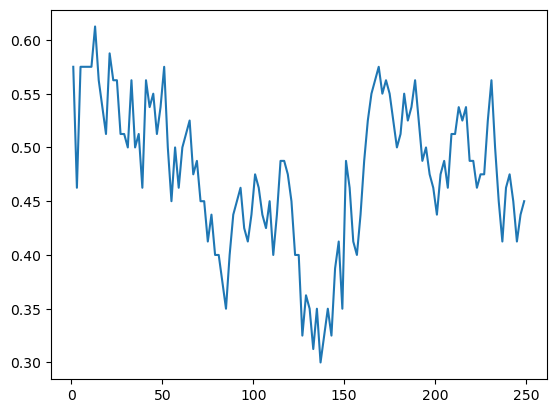

In [20]:
plt.plot(k,accu)

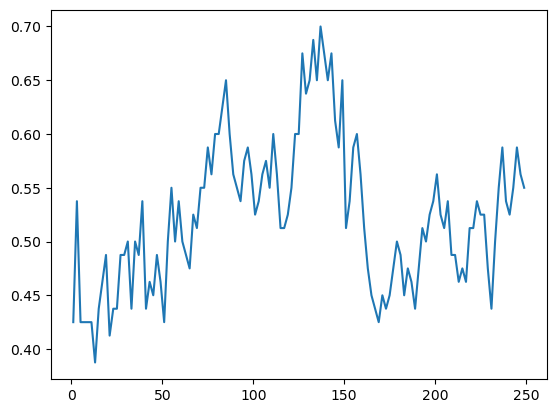

In [21]:
plt.plot(k,error)